In [1]:
# import required libraries
import struct
import sys
import serial
import binascii
import time
import numpy as np
import math

import os
import datetime
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


# Local File Imports
from parse_bin_output import *

import time
from IPython.display import clear_output

In [3]:
from radar_tracking_2 import *

In [22]:
one = "/Users/wolf/dev/radar/Industrial_Visualizer/binData/12_01_2023_18_49_41"
two = "/Users/wolf/dev/radar/Industrial_Visualizer/binData/12_01_2023_18_53_10"
three = "/Users/wolf/dev/radar/Industrial_Visualizer/binData/12_01_2023_19_31_53"
four = "/Users/wolf/dev/radar/Industrial_Visualizer/binData/12_01_2023_19_31_53/pHistBytes_1.bin"
five = "/Users/wolf/dev/radar/Industrial_Visualizer/binData/12_01_2023_19_31_53/pHistBytes_2.bin"

In [53]:
output_dict = parse_ADC(five)
print(f"\neach frame dict contains following informations: {output_dict[0].keys()}")


each frame dict contains following informations: dict_keys(['targetFrameNum', 'header', 'bytes', 'numDetectedPoints', 'pointCloud', 'rangeProfile'])


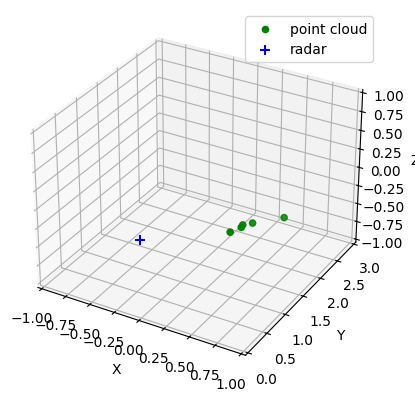

In [24]:
# for creating a responsive plot
%matplotlib inline

target_frame = 0

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xyz = output_dict[target_frame]['pointCloud'][:,0:3]

# xyz coordinate of detected points
x =xyz[:,0]
y =xyz[:,1]
z =xyz[:,2]

# xyz coordinate of radar
radar_x = [0]
radar_y = [0]
radar_z = [0]

ax.scatter(x, y, z, c='g', marker='o', label='point cloud')
ax.scatter(radar_x, radar_y, radar_z, c="b", marker='+', label='radar', s=[50])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(-1,1)
ax.set_ylim(0,3)
ax.set_zlim(-1,1)

ax.legend()
plt.show()

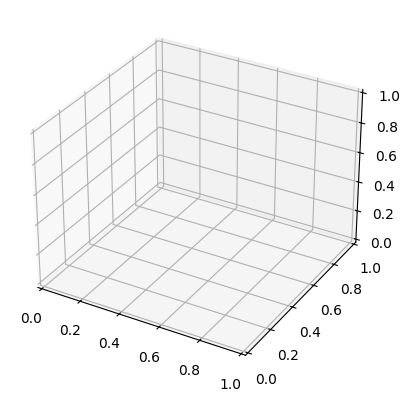

In [25]:
%matplotlib inline
def pointCloud2video(output_dict):
    '''
    Complete this function
    '''
    # for creating a responsive plot
    for target_frame in range(100):
        try:
            fig = plt.figure()
            ax = fig.add_subplot(111, projection='3d')

            xyz = output_dict[target_frame]['pointCloud'][:,0:3]

            # xyz coordinate of detected points
            x =xyz[:,0]
            y =xyz[:,1]
            z =xyz[:,2]

            # xyz coordinate of radar
            radar_x = [0]
            radar_y = [0]
            radar_z = [0]

            ax.scatter(x, y, z, c='g', marker='o', label='point cloud')
            ax.scatter(radar_x, radar_y, radar_z, c="b", marker='+', label='radar', s=[50])
            ax.set_xlabel('X')
            ax.set_ylabel('Y')
            ax.set_zlabel('Z')
            ax.set_xlim(-1,1)
            ax.set_ylim(0,3)
            ax.set_zlim(-1,1)

            ax.legend()
            plt.show()
            time.sleep(0.2)
            clear_output(wait=True)
        except:
            print("No point cloud data available")
            time.sleep(0.2)
            clear_output(wait=True)
            break

# pointCloud = output_dict[:]['pointCloud'][:,0:3]

pointCloud2video(output_dict)

In [56]:
def determine_optimal_clusters(xyz, max_k=5):
    best_k = 1
    best_score = -1

    # Handle k=1 separately
    if len(xyz) > 1:
        kmeans = KMeans(n_clusters=1, random_state=0).fit(xyz)
        # Use inertia as a measure for a single cluster
        best_score = -kmeans.inertia_  # Negate inertia because lower inertia is better, but we want higher score to be better
        # print(f"Score for 1 cluster: {best_score}")

    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=0, n_init=10).fit(xyz)
        labels = kmeans.labels_
        score = silhouette_score(xyz, labels)
        # print(f"Score for {k} clusters: {score}")

        if score > best_score:
            best_score = score
            best_k = k

    return best_k

In [57]:
THRESHOLD = 5
count = 0
total_people = 0
for frame, data in enumerate(output_dict):
        if "pointCloud" in data:
            if data['pointCloud'].shape[0] > THRESHOLD:
                # print(f"Frame {frame} has {data['pointCloud'].shape[0]} points and is therefore valid")
                xyz = data['pointCloud'][:, 0:3]
                optimal_clusters = determine_optimal_clusters(xyz)
                # print(f"Frame {frame} has {data['pointCloud'].shape[0]} points and {optimal_clusters} clusters")
                count += 1
                total_people += optimal_clusters
        else:
            # print(f"Frame {frame} does not meet the threshold of {THRESHOLD} points")
            continue
print(f"Total number of valid frames: {count}")
print(f"Total number of people: {total_people}")
print(f"Average number of people per frame: {math.floor(total_people / count)}")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

Total number of valid frames: 16
Total number of people: 32
Average number of people per frame: 2


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

In [59]:
import socket

In [62]:
sock = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)
sock.sendto(b'1', ("172.16.120.188", 5000))

1